In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os

In [3]:
os.chdir('/content/gdrive/MyDrive/Car_brand_prediction')

In [6]:
from tensorflow.keras.layers import Input,Lambda, Dense, Flatten ,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np
from matplotlib import pyplot as plt

In [7]:
IMAGE_SIZE = [224,224]
train_path = 'Datasets/Train'
test_path = 'Datasets/Test'

In [8]:
resnet50 = ResNet50(input_shape= IMAGE_SIZE + [3] , weights='imagenet',include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [9]:
for layer in resnet50.layers:
  layer.trainable = False

In [16]:
folders = glob('Datasets/Train/*')

In [17]:
folders

['Datasets/Train/lamborghini',
 'Datasets/Train/audi',
 'Datasets/Train/mercedes']

In [18]:
X = Flatten()(resnet50.output)

In [19]:
prediction = Dense(len(folders),activation = 'softmax')(X)

In [36]:
model = Model(inputs = resnet50.input , outputs = prediction)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [23]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [25]:
train_set = train_datagen.flow_from_directory('Datasets/Train',target_size = (224,224),batch_size = 32,class_mode='categorical')

Found 64 images belonging to 3 classes.


In [26]:
test_set = test_datagen.flow_from_directory('Datasets/Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 58 images belonging to 3 classes.


In [29]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 1s 722ms/step - loss: 0.2087 - accuracy: 0.9219 - val_loss: 0.9676 - val_accuracy: 0.7241
Epoch 2/50
2/2 [==============================] - 1s 648ms/step - loss: 0.2329 - accuracy: 0.9375 - val_loss: 1.0652 - val_accuracy: 0.6207
Epoch 3/50
2/2 [==============================] - 1s 664ms/step - loss: 0.1871 - accuracy: 0.9688 - val_loss: 0.9852 - val_accuracy: 0.7241
Epoch 4/50
2/2 [==============================] - 1s 665ms/step - loss: 0.1935 - accuracy: 0.9531 - val_loss: 1.0676 - val_accuracy: 0.6897
Epoch 5/50
2/2 [==============================] - 1s 665ms/step - loss: 0.1369 - accuracy: 0.9844 - val_loss: 1.0286 - val_accuracy: 0.6552
Epoch 6/50
2/2 [==============================] - 1s 649ms/step - loss: 0.1522 - accuracy: 0.9844 - val_loss: 0.9788 - val_accuracy: 0.7414
Epoch 7/50
2/2 [==============================] - 1s 655ms/step - loss: 0.1971 - accuracy: 0.9375 - val_loss: 0.9623 - val_accuracy: 0.7241
Epoch 8/50
2/2 [====

In [31]:
r.history

{'accuracy': [0.921875,
  0.9375,
  0.96875,
  0.953125,
  0.984375,
  0.984375,
  0.9375,
  0.890625,
  0.984375,
  0.859375,
  0.890625,
  0.984375,
  0.90625,
  0.9375,
  0.921875,
  0.9375,
  0.953125,
  0.953125,
  0.90625,
  0.96875,
  0.9375,
  0.953125,
  0.921875,
  0.953125,
  0.875,
  0.9375,
  0.953125,
  0.9375,
  0.90625,
  0.96875,
  0.9375,
  0.96875,
  0.984375,
  0.953125,
  0.953125,
  0.9375,
  0.9375,
  0.921875,
  0.84375,
  0.9375,
  0.890625,
  0.921875,
  0.953125,
  0.921875,
  0.96875,
  0.90625,
  0.984375,
  0.9375,
  1.0,
  0.9375],
 'loss': [0.20873089134693146,
  0.23291653394699097,
  0.18709057569503784,
  0.19347935914993286,
  0.13691791892051697,
  0.1522221863269806,
  0.19706717133522034,
  0.3428442180156708,
  0.14140890538692474,
  0.24972164630889893,
  0.23557159304618835,
  0.16809161007404327,
  0.22280631959438324,
  0.1732446402311325,
  0.1929337978363037,
  0.1988523006439209,
  0.16400744020938873,
  0.15710733830928802,
  0.2429700493

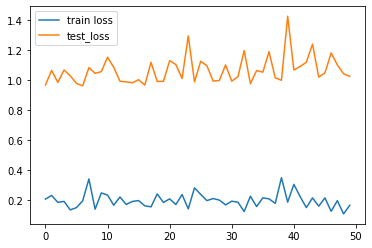

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()
plt.savefig('loss_val_loss')

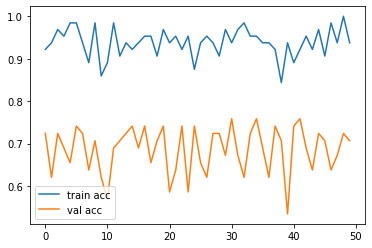

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [37]:
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [42]:
y_pred = model.predict(test_set)

In [43]:
y_pred

array([[1.4114742e-02, 8.6040449e-01, 1.2548076e-01],
       [9.9262404e-01, 3.6654361e-03, 3.7105710e-03],
       [3.2907608e-01, 4.9112306e-05, 6.7087483e-01],
       [5.0632870e-03, 4.7922328e-02, 9.4701439e-01],
       [7.1322894e-01, 2.5741395e-01, 2.9357070e-02],
       [3.1785916e-03, 1.4446138e-01, 8.5236007e-01],
       [2.4088940e-02, 9.5363194e-01, 2.2279095e-02],
       [8.3400924e-03, 9.1042632e-01, 8.1233643e-02],
       [5.2325395e-03, 1.7286421e-01, 8.2190329e-01],
       [2.9237390e-02, 2.0593137e-01, 7.6483124e-01],
       [4.0156422e-03, 9.3603992e-01, 5.9944551e-02],
       [1.9176060e-04, 9.9597353e-01, 3.8347677e-03],
       [3.8307139e-03, 7.7850139e-01, 2.1766789e-01],
       [8.2790112e-01, 2.0007329e-02, 1.5209153e-01],
       [3.3156401e-03, 6.7542660e-01, 3.2125777e-01],
       [7.5715240e-03, 1.8178521e-01, 8.1064326e-01],
       [1.5626666e-01, 6.1418748e-01, 2.2954582e-01],
       [6.9113281e-03, 8.4340304e-01, 1.4968570e-01],
       [1.8997300e-02, 5.121

In [44]:
#for each record whichevr has the highest value take that 
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [45]:
y_pred

array([1, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2])

In [46]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [47]:
model = load_model('model_resnet50.h5')

In [48]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [49]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [50]:
x.shape

(224, 224, 3)

In [51]:
x = x/255

In [52]:
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.76862746, 0.73333335, 0.6745098 ],
        [0.8509804 , 0.8156863 , 0.75686276],
        [0.9529412 , 0.91764706, 0.85882354]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.9607843 , 0.92941177],
        [0.9529412 , 0.9529412 , 0.92156863],
        [0.9490196 , 0.9490196 , 0.91764706]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9411765 , 0.9764706 , 0.972549  ],
        [0.9490196 , 0.9843137 , 0.98039216],
        [0.9490196 , 0.9843137 , 0.98039216]],

       ...,

       [[0.7411765 , 0.8117647 , 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [53]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [54]:

model.predict(img_data)

array([[4.6315166e-05, 7.7060234e-09, 9.9995363e-01]], dtype=float32)